In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.read_csv('data.csv', sep=' ')
co2_data = pd.read_csv('data.csv', sep=' ')

{1958: 672.051428571429, 1959: 673.738248571429, 1960: 675.4731385714291, 1961: 677.2429885714291, 1962: 679.0609085714292, 1963: 680.9487485714293, 1964: 682.9152485714293, 1965: 684.9429285714293, 1966: 687.0580085714292, 1967: 689.2255285714292, 1968: 691.4411185714292, 1969: 693.7484785714292, 1970: 696.1607185714294, 1971: 698.5729585714294, 1972: 701.0463785714293, 1973: 703.6159385714293, 1974: 706.1898685714293, 1975: 708.7506885714294, 1976: 711.4557185714293, 1977: 714.2306685714293, 1978: 717.0318385714293, 1979: 719.9466285714292, 1980: 722.8177185714293, 1981: 725.6276285714292, 1982: 728.5074585714293, 1983: 731.4003985714293, 1984: 734.3938485714292, 1985: 737.4615885714293, 1986: 740.6123585714294, 1987: 743.8286785714294, 1988: 747.1498785714293, 1989: 750.5322585714293, 1990: 753.9321185714293, 1991: 757.4062685714293, 1992: 760.7842785714294, 1993: 764.1535485714294, 1994: 767.5708885714295, 1995: 771.0362985714294, 1996: 774.5497785714293, 1997: 778.0938485714294, 1

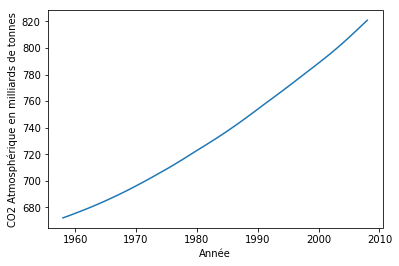

In [97]:
Emissions = [float(j.replace(",", ".")) for j in [i for i in co2_data['Em']]]
Util_terres = [float(j.replace(",", ".")) for j in [i for i in co2_data['Util_terres']]]
List_Y = [int(i) for i in co2_data['Année']]

def calcul_co2_y(Le,Lu,a_at,a_y,N):
    """list[float]*list[float]*float*int*float->dict[int:float]
     Etant donnés deux listes (une des émissions d'énergies fossiles par année et une autre des utilisations des terres par année), 
     mais aussi de la quantité de CO2 atmosphérique pour une année initiale et d'un pourcentage d'absorption liée à l'absorption 
     du CO2 par la nature, la fonction renvoie un dictionnaire dont les clés sont les années et les valeurs associés sont le taux 
     de CO2 atmosphérique à ces années respectivements en milliards de tonnes
     Hyp : len(Le)=len(Lu) """
    
    CO2_at = a_at 
    D = {a_y:a_at}
    
    for i in range(0,len(Le)):
        CO2_at = CO2_at + Le[i] + Lu[i] - N*(Le[i] + Lu[i])
        D[a_y+i+1] = CO2_at
       
    List_CO2 = [i for i in D.values()]
    
    plt.plot([a_y]+List_Y , List_CO2)
    plt.xlabel('Année')
    plt.ylabel('CO2 Atmosphérique en milliards de tonnes')
    
    return D

print(calcul_co2_y(Emissions,Util_terres,672.051428571429,1958,56.3/100))

